<a href="https://colab.research.google.com/github/RifatMuhtasim/Deep_Learning/blob/main/Learn/18.Customer_Churn_Prediction_With_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import seaborn as sns

In [85]:
pd.set_option("display.max_columns", None)

In [86]:
df0 = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv")
print(df0.shape)
df0.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Inspection

In [87]:
df0.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [88]:
df1 = df0.drop("customerID", axis="columns")
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1['TotalCharges'].dtypes

dtype('float64')

## Data Exploration

In [90]:
mc_churn_no = df1[df1['Churn']=="No"]['tenure']
mc_churn_yes = df1[df1['Churn'] == "Yes"]['tenure']

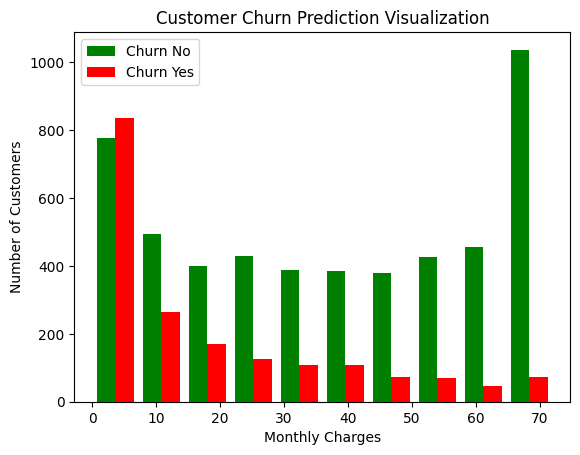

In [91]:
plt.hist([mc_churn_no, mc_churn_yes], color=['green', 'red'], label=['Churn No', 'Churn Yes'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()
plt.show()

# Data Cleaning and Label encoding.

In [92]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [93]:
# Unique value
def Print_the_unique_value(df):
  for col in df:
    if df[col].dtypes == "object":
      print(f'{col}: {df[col].unique()}')

Print_the_unique_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [94]:
# Replace the unnecessary value
df1.replace({'No internet service': "No", 'No phone service': 'No'}, inplace=True)

In [95]:
# Binary Label
df1.replace({"Yes": 1, "No": 0 }, inplace=True)

In [96]:
# Gender
df1.replace({'Male': 1, "Female": 0}, inplace=True)

In [97]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1953,1,0,0,1,1,1,0,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Electronic check,75.35,75.35,1
5021,0,0,1,1,23,1,1,Fiber optic,1,0,0,0,0,0,One year,0,Credit card (automatic),81.85,1810.85,0
5452,0,0,1,1,37,1,0,DSL,1,1,0,0,1,1,One year,0,Bank transfer (automatic),75.10,2658.80,0


In [98]:
df1['InternetService'] = df1['InternetService'].apply(lambda x: "No" if x == 0 else x)

In [99]:
df2 = df1.copy()
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Dummy variables

In [100]:
df3 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [101]:
# MinMax Scaling
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [102]:
df = df3.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,0,0,0,1,0


# Train Test Split

In [103]:
df.isna().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check  

In [104]:
df.dropna(inplace=True)

In [105]:
X = df.drop("Churn", axis="columns")
y = df['Churn']

In [106]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,1,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,0,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,0,0,0,1,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2)
X_train.shape

(5625, 23)

# Model Building

In [108]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23, ), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, epochs= 50)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7175
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.7893
Epoch 3/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.7957
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4201 - accuracy: 0.8000
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8030
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4170 - accuracy: 0.8007
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8021
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8036
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8032
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8053

In [109]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7910


[0.43083515763282776, 0.7910447716712952]

In [110]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.27032456],
       [0.27183688],
       [0.02279346],
       [0.00955561],
       [0.24910492]], dtype=float32)

In [111]:
y_pred = []
for x in yp:
  if x >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [112]:
y_test[:10]

5501    0
4850    0
2963    0
2154    0
495     1
1558    1
4821    0
4332    0
5012    0
981     0
Name: Churn, dtype: int64

## Report

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1057
           1       0.58      0.55      0.57       350

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.79      0.79      0.79      1407



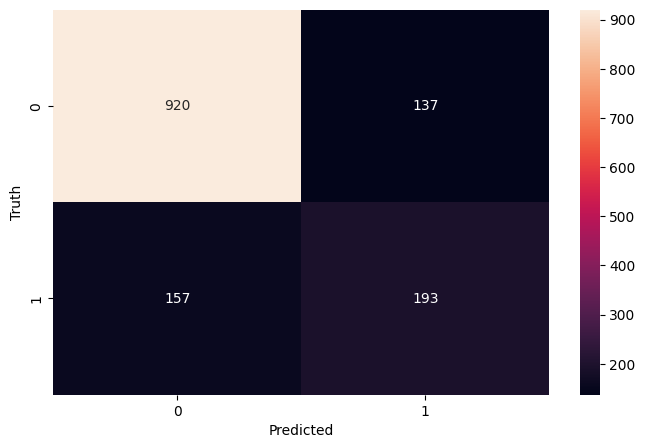

In [114]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()